# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

# Load and inspect dataset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../files/data_6.csv')

In [4]:
df.head()

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HasPhotovoltaics,HeatingType,HasFiberglass,IsFurnished,DateSinceForSale,HouseColor,PreviousOwnerName,HasFireplace,KitchensQuality,BathroomsQuality,BedroomsQuality,LivingRoomsQuality,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,WindowModelNames,Price
0,1.0,2.0,127.0,Rural,69.0,Good,False,Electric,True,True,2023-09-25,Yellow,Martin,False,Good,Good,Good,Good,16.0,1.33,NaN,M3VPE Wood LQRCLH,346.57594
1,3.0,3.0,129.0,Rural,65.0,NaN,True,Oil Heating,False,False,2022-09-22,Gray,NaN,False,Poor,Good,Excellent,Poor,16.0,1.52,NaN,E5BJG Steel BVYWGBZ Window,429.91007
2,1.0,2.0,99.0,Urban,43.0,Excellent,False,Electric,True,True,2022-05-01,White,Stefan,False,Good,Good,Excellent,Poor,46.0,2.49,59.4,Aluminum 263R,243.80271
3,2.0,NaN,126.0,Rural,35.0,NaN,False,Oil Heating,False,False,2020-12-10,White,Daniel,False,Good,Good,Good,Good,6.0,1.44,201.6,Steel 3K90,378.22772
4,1.0,3.0,101.0,Rural,54.0,NaN,NaN,Electricity,False,True,2022-09-24,Gray,NaN,False,Excellent,Poor,Poor,Good,6.0,1.88,60.0,U6Y6P Wood BJ7 Window,249.67852


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bedrooms             914 non-null    float64
 1   Bathrooms            757 non-null    float64
 2   SquareFootageHouse   995 non-null    float64
 3   Location             989 non-null    object 
 4   Age                  837 non-null    float64
 5   PoolQuality          671 non-null    object 
 6   HasPhotovoltaics     749 non-null    object 
 7   HeatingType          995 non-null    object 
 8   HasFiberglass        995 non-null    object 
 9   IsFurnished          995 non-null    object 
 10  DateSinceForSale     995 non-null    object 
 11  HouseColor           942 non-null    object 
 12  PreviousOwnerName    610 non-null    object 
 13  HasFireplace         995 non-null    object 
 14  KitchensQuality      995 non-null    object 
 15  BathroomsQuality     995 non-null    ob

# EDA

## Missing values

In [6]:
print("\nDistribution % of Missing Values in Numerical Columns:")
numerical_columns = df.select_dtypes(include=np.number).columns
numerical_missing_distribution = df[numerical_columns].isnull().mean() * 100
display(numerical_missing_distribution)


Distribution % of Missing Values in Numerical Columns:


Bedrooms                8.6
Bathrooms              24.3
SquareFootageHouse      0.5
Age                    16.3
SquareFootageGarden     0.5
PreviousOwnerRating     0.5
HeatingCosts           49.4
Price                   0.5
dtype: float64

In [7]:
print("\nDistribution % of Missing Values in Categorical Columns:")
categorical_columns = [column for column in df.columns if column not in numerical_columns]
categorical_missing_distribution = df[categorical_columns].isnull().mean() * 100
display(categorical_missing_distribution)


Distribution % of Missing Values in Categorical Columns:


Location               1.1
PoolQuality           32.9
HasPhotovoltaics      25.1
HeatingType            0.5
HasFiberglass          0.5
IsFurnished            0.5
DateSinceForSale       0.5
HouseColor             5.8
PreviousOwnerName     39.0
HasFireplace           0.5
KitchensQuality        0.5
BathroomsQuality       0.5
BedroomsQuality        0.5
LivingRoomsQuality     0.5
WindowModelNames       0.5
dtype: float64

## Statistics

In [8]:
df[numerical_columns].describe()

,Bedrooms,Bathrooms,SquareFootageHouse,Age,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,Price
count,914.000000,757.000000,995.000000,837.000000,995.000000,995.000000,506.000000,995.000000
mean,1.657549,1.713342,170.490452,44.476703,12.432161,2.570764,170.564822,272.635479
std,0.980541,1.030485,794.871558,18.148800,11.127312,0.871676,778.798787,594.558945
min,1.000000,1.000000,-957.000000,-82.000000,6.000000,1.010000,-981.000000,24.146300
25%,1.000000,1.000000,52.000000,35.000000,6.000000,1.900000,48.150000,127.218185
50%,1.000000,1.000000,84.000000,47.000000,6.000000,2.470000,76.800000,182.828430
75%,2.000000,2.000000,117.000000,58.000000,16.000000,3.130000,120.000000,273.291320
max,5.000000,5.000000,8979.000000,71.000000,46.000000,4.980000,8326.000000,8597.678000


In [9]:
df[categorical_columns].describe()

,Location,PoolQuality,HasPhotovoltaics,HeatingType,HasFiberglass,IsFurnished,DateSinceForSale,HouseColor,PreviousOwnerName,HasFireplace,KitchensQuality,BathroomsQuality,BedroomsQuality,LivingRoomsQuality,WindowModelNames
count,989,671,749,995,995,995,995,942,610,995,995,995,995,995,995
unique,4,4,2,5,2,2,728,4,15,2,3,3,3,3,995
top,Rural,None,False,Gas,False,True,2020-01-31,Green,Andreas,False,Good,Good,Good,Good,M3VPE Wood LQRCLH
freq,339,399,569,292,608,708,4,242,55,992,488,524,485,508,1


## Univariate Analysis

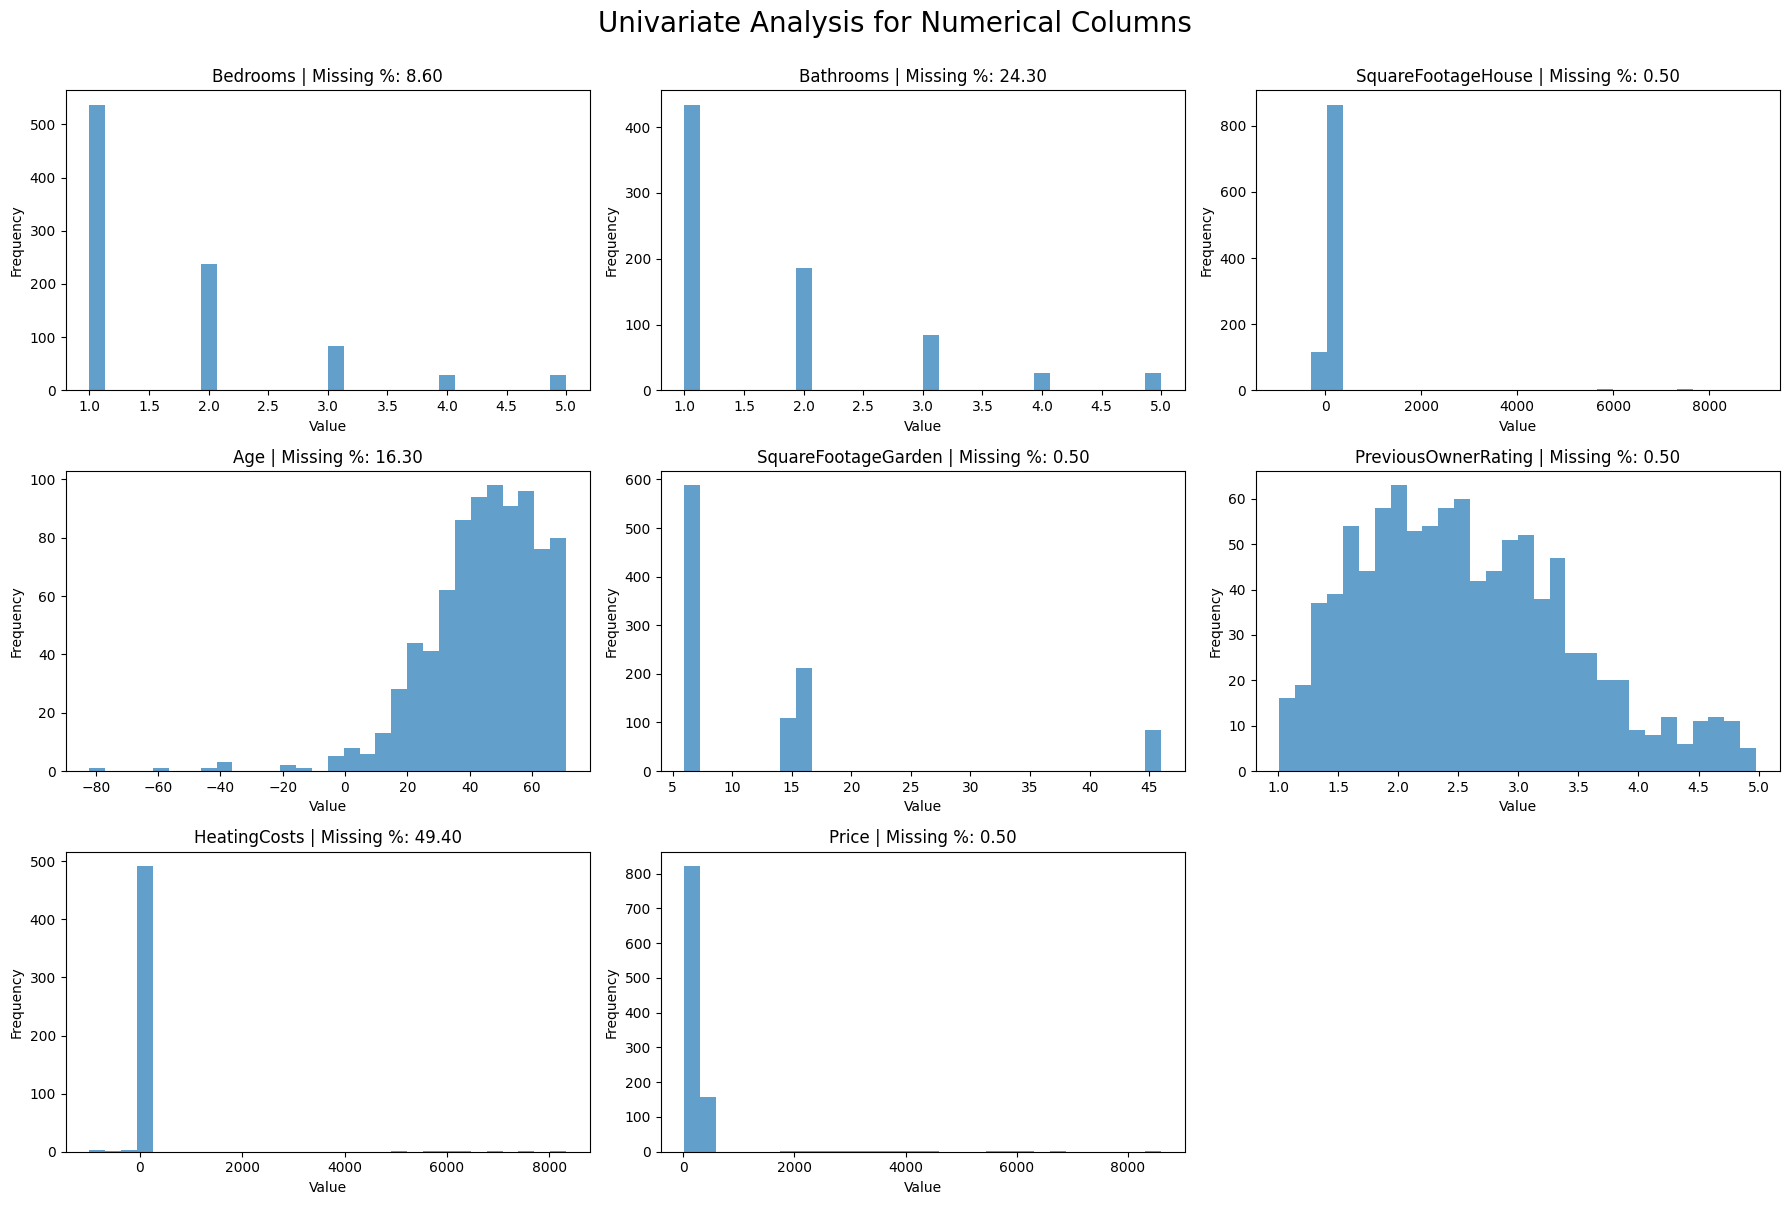

In [10]:
# Determine the number of rows and columns for subplots
num_features = len(numerical_columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features - 1) // num_cols + 1  # Number of rows for subplots

# Set the figure size
plt.figure(figsize=(18, 4 * num_rows))
plt.suptitle("Univariate Analysis for Numerical Columns", fontsize=20, y=1)
# Plot histograms for each numerical feature
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(df[column], bins=30, alpha=0.7)
    plt.title(f'{column} | Missing %: {numerical_missing_distribution[column]:.2f}')
    plt.xlabel("Value")
    plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

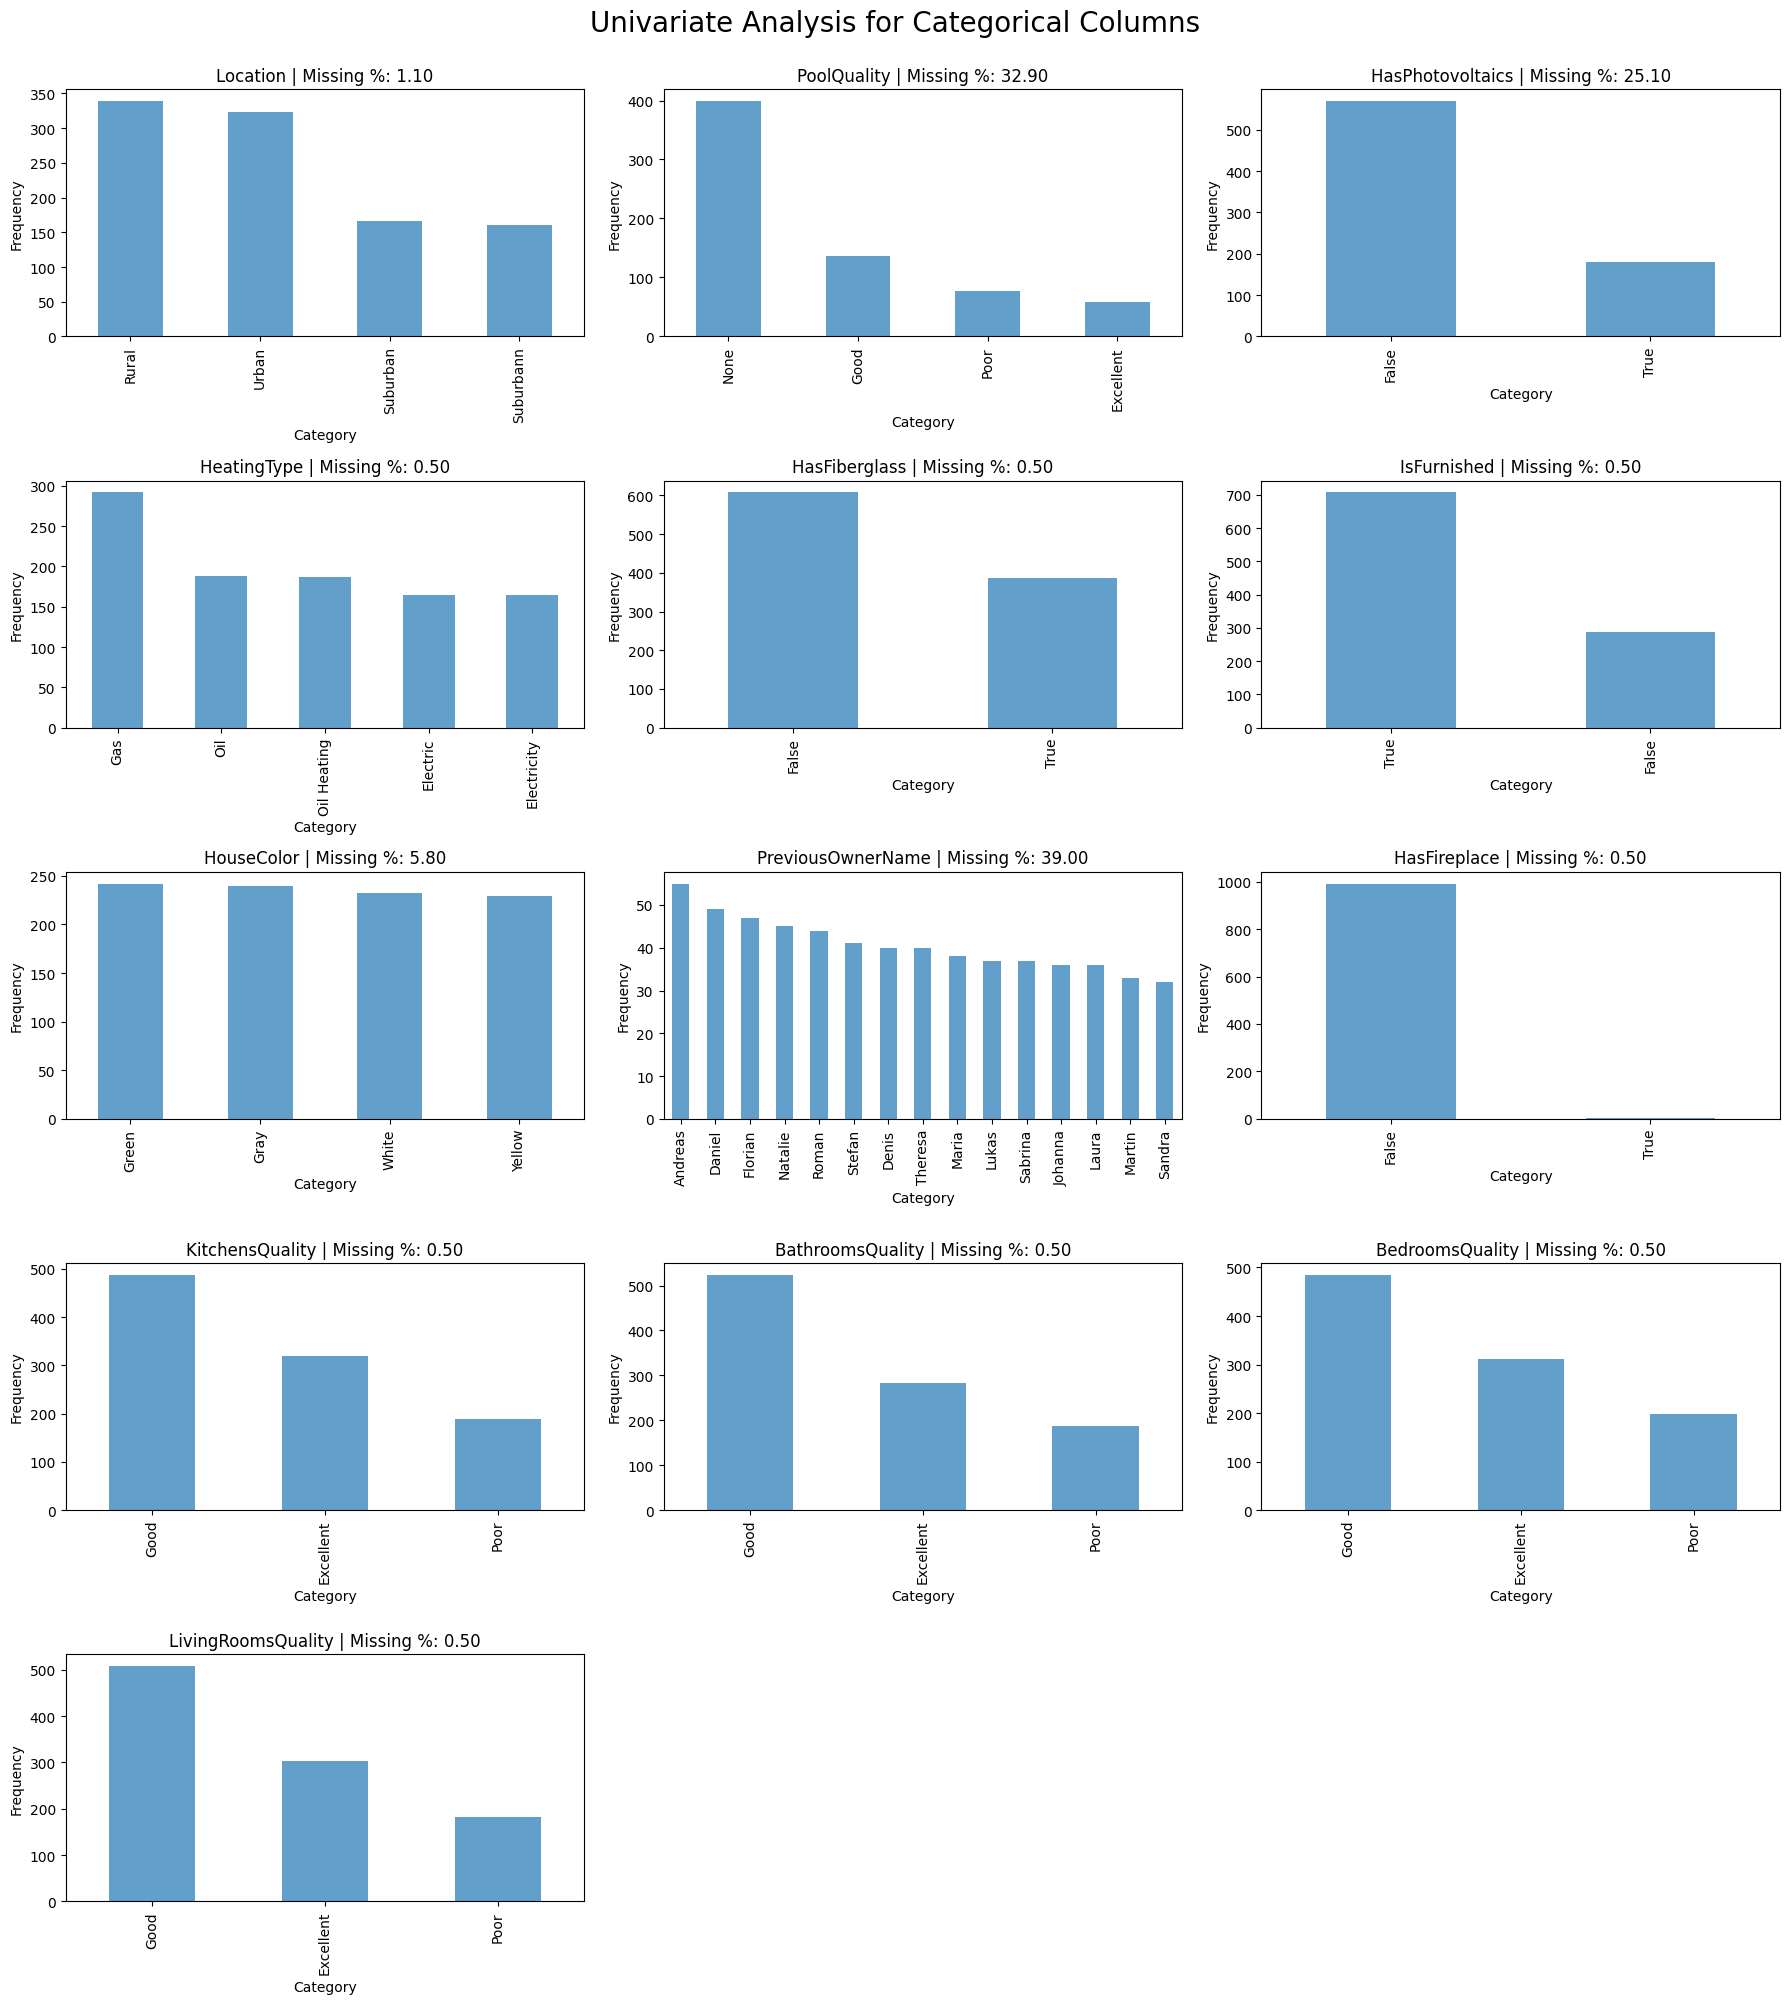

In [11]:
# Determine the number of rows and columns for subplots
num_features = len(categorical_columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features - 1) // num_cols + 1  # Number of rows for subplots

# List of features to be excluded from the univariate analysis
exclude_items = ['DateSinceForSale', 'WindowModelNames']

# Filter out unwanted items
filtered_columns = [column for column in categorical_columns if column not in exclude_items]

# Set the figure size
plt.figure(figsize=(18, 4 * num_rows))
plt.suptitle("Univariate Analysis for Categorical Columns", fontsize=20, y=1)
# Plot histograms for each numerical feature
for i, column in enumerate(filtered_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    df[column].value_counts().plot(kind='bar', alpha=0.7)
    plt.title(f'{column} | Missing %: {categorical_missing_distribution[column]:.2f}')
    plt.xlabel("Category")
    plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
print(f"The column `DateSinceForSale` has {df['DateSinceForSale'].nunique()} unique entries")
print(f"The column `WindowModelNames` has {df['WindowModelNames'].nunique()} unique entries")

The column `DateSinceForSale` has 728 unique entries
The column `WindowModelNames` has 995 unique entries


## Correlation Analysis

In [13]:
# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

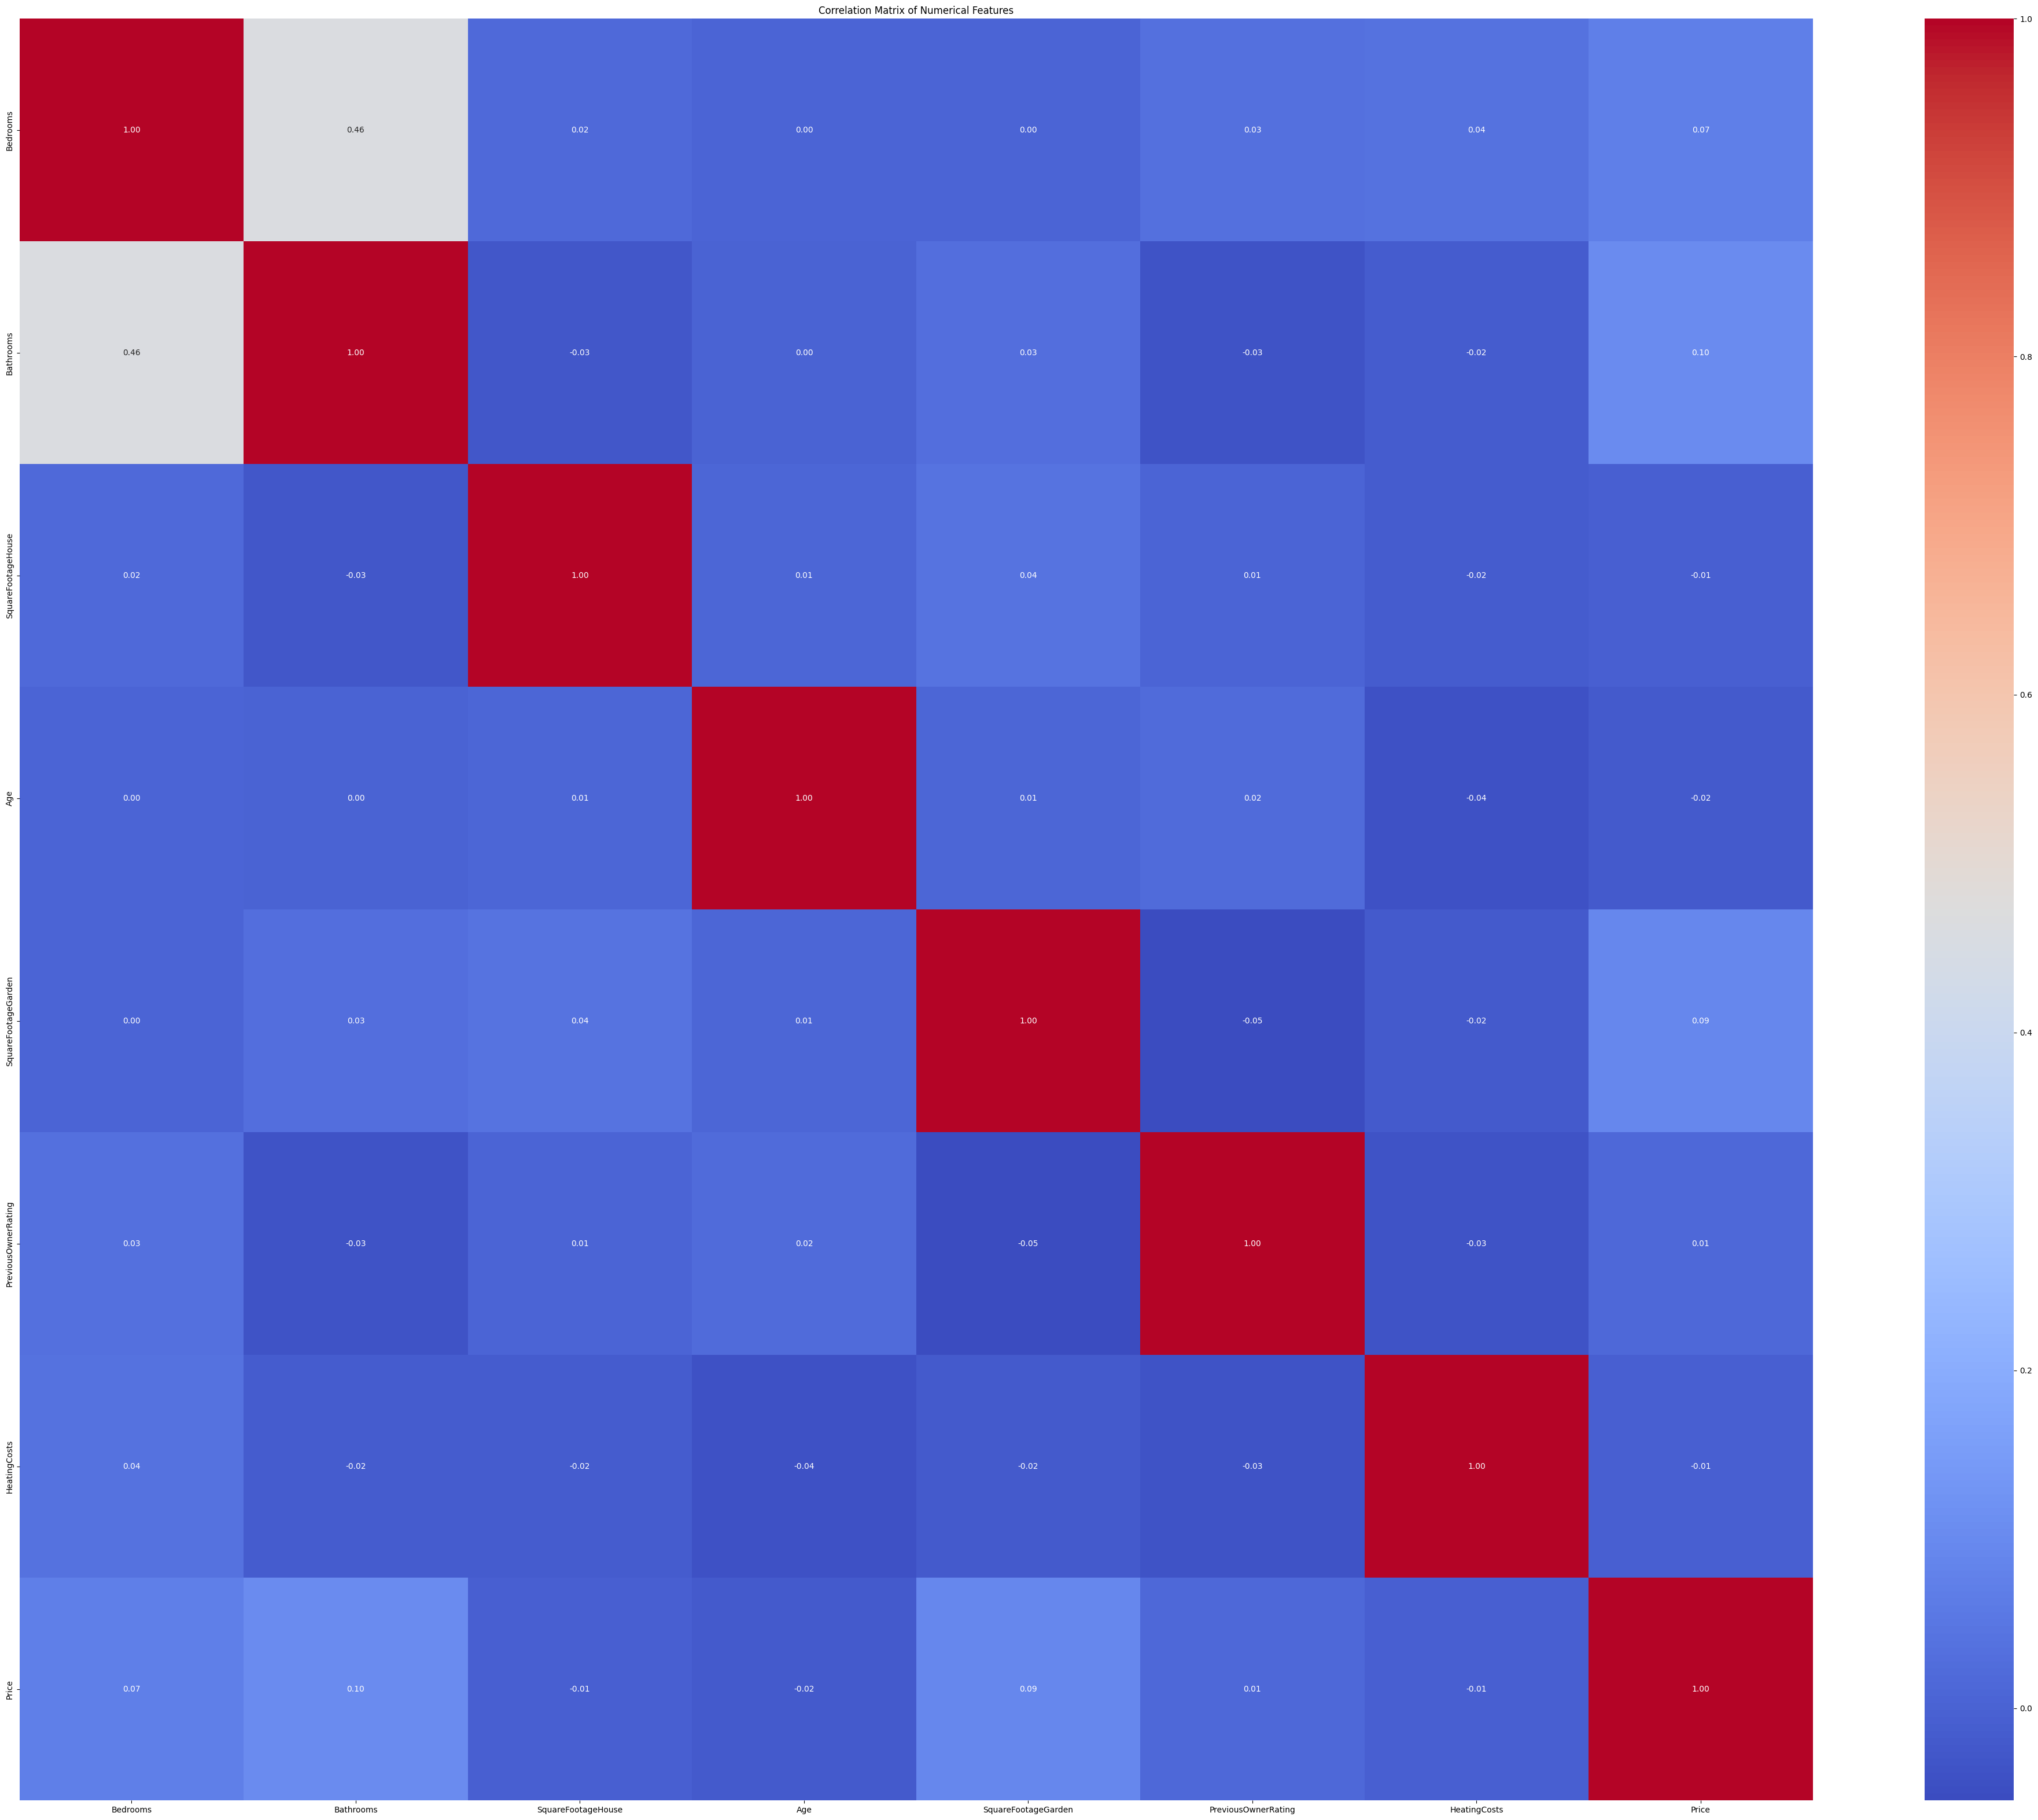

In [14]:
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Correlation PreviousOwnerName and PreviousOwnerRating

Distinct names in the PreviousOwnerName column: 16
Names in the PreviousOwnerName column: ['Martin' nan 'Stefan' 'Daniel' 'Natalie' 'Lukas' 'Johanna' 'Roman'
 'Laura' 'Florian' 'Sabrina' 'Andreas' 'Denis' 'Maria' 'Theresa' 'Sandra']
Andreas   -0.001575
Daniel    -0.025949
Denis     -0.041523
Florian    0.058259
Johanna   -0.030810
Laura     -0.008880
Lukas      0.019885
Maria     -0.019194
Martin     0.016844
Natalie   -0.007796
Roman      0.024949
Sabrina    0.014276
Sandra     0.059536
Stefan     0.029417
Theresa   -0.077169
NaN       -0.002710
Name: PreviousOwnerRating, dtype: float64


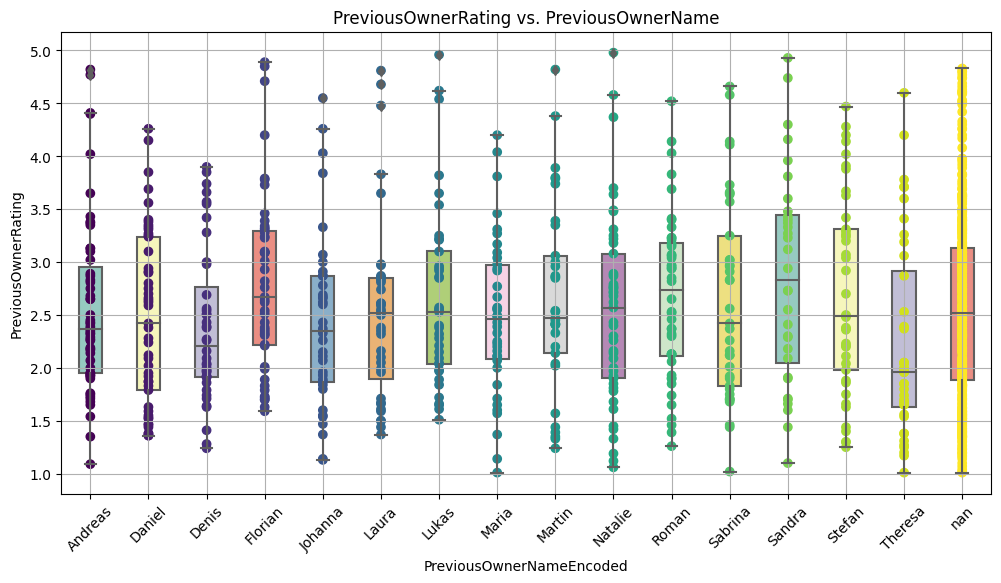

In [15]:
distinct_names = df['PreviousOwnerName'].unique()
print(f"Distinct names in the PreviousOwnerName column: {len(distinct_names)}")
print(f"Names in the PreviousOwnerName column: {distinct_names}")

one_hot_encoded = pd.get_dummies(df['PreviousOwnerName'], dummy_na=True)

df_encoded = pd.concat([df, one_hot_encoded], axis=1)

correlation_matrix = df_encoded[['PreviousOwnerRating'] + list(one_hot_encoded.columns)].corr()

correlation_with_rating = correlation_matrix['PreviousOwnerRating'].drop('PreviousOwnerRating')

print(correlation_with_rating)


label_encoder = LabelEncoder()
df['PreviousOwnerNameEncoded'] = label_encoder.fit_transform(df['PreviousOwnerName'])

plt.figure(figsize=(12, 6))

plt.scatter(df['PreviousOwnerNameEncoded'], df['PreviousOwnerRating'], c=df['PreviousOwnerNameEncoded'], cmap='viridis', label='PreviousOwnerRating vs. PreviousOwnerName')

sns.boxplot(x='PreviousOwnerNameEncoded', y='PreviousOwnerRating', data=df, palette='Set3', width=0.4)

plt.xlabel('PreviousOwnerNameEncoded')
plt.ylabel('PreviousOwnerRating')
plt.title('PreviousOwnerRating vs. PreviousOwnerName')
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.grid(True)
plt.show()

In [16]:
df = df.dropna(subset=['PreviousOwnerName', 'PreviousOwnerRating'])

# Group the data by PreviousOwnerName
grouped_data = [df['PreviousOwnerRating'][df['PreviousOwnerName'] == name] for name in df['PreviousOwnerName'].unique()]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 1.3274673927714788
P-value: 0.18562303187524484


## Multivariate Analysis

### Age vs. Price Scatter Plot

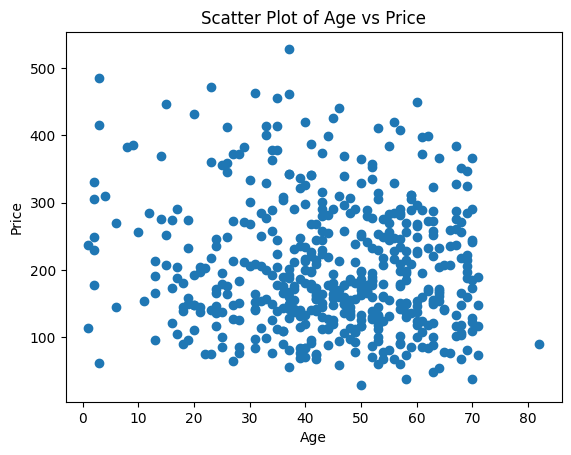

In [17]:
filtered_df = df[df['Price'] < 1000]

plt.scatter(filtered_df['Age'].abs(), filtered_df['Price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter Plot of Age vs Price')
plt.show()


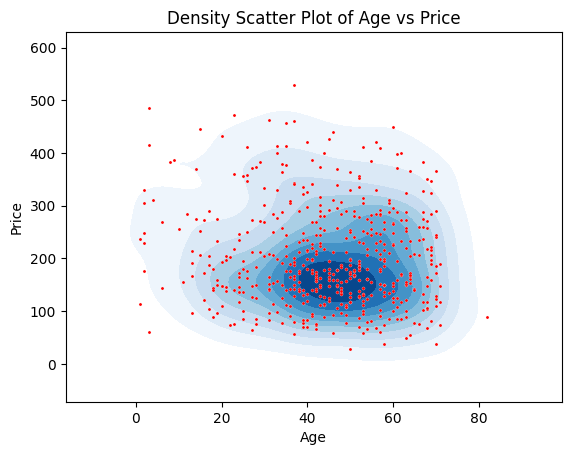

In [18]:
filtered_df = df[df['Price'] < 1000]

sns.kdeplot(x=filtered_df['Age'].abs(), y=filtered_df['Price'], fill=True, cmap='Blues', levels=10)
sns.scatterplot(x=filtered_df['Age'].abs(), y=filtered_df['Price'], alpha=1, s=5, color='red')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Density Scatter Plot of Age vs Price')
plt.show()


### Location vs. Price histograms

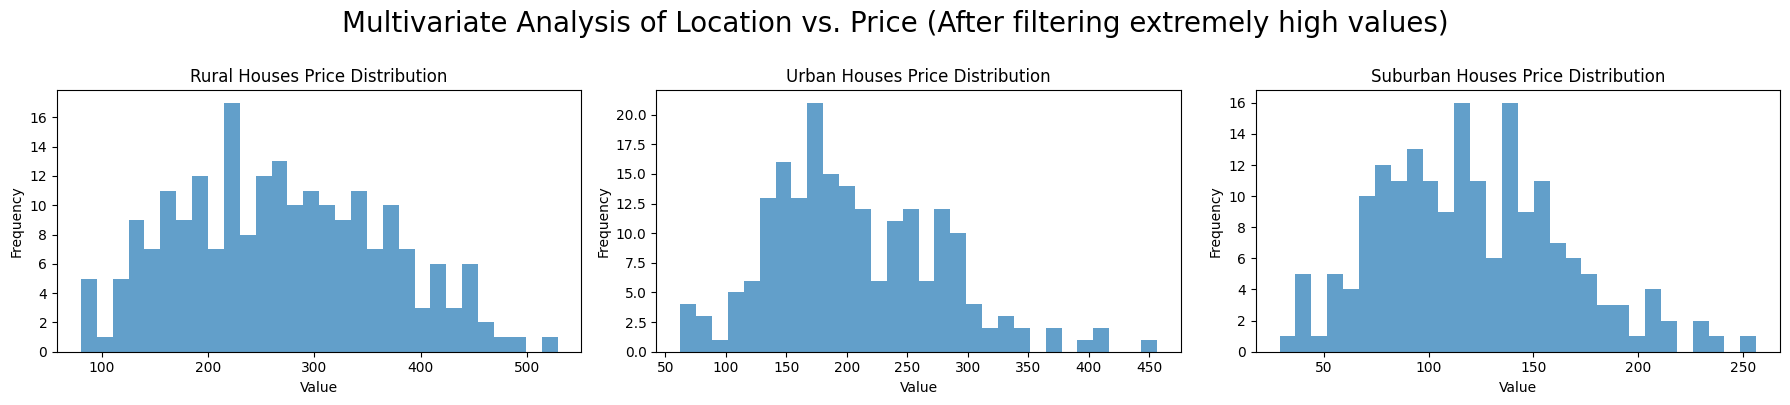

In [19]:
num_cols = 3  # Number of columns for subplots
num_rows = 1  # Number of rows for subplots

location_values = ['Rural', 'Urban', 'Suburban']

# Set the figure size
plt.figure(figsize=(18, 4 * num_rows))
plt.suptitle("Multivariate Analysis of Location vs. Price (After filtering extremely high values)", fontsize=20, y=1)
# Plot histograms for each numerical feature
for i, column in enumerate(location_values, 1):
    if column == 'Rural':
        rural_houses_df = df[df['Location'] == 'Rural']
        rural_houses_df = rural_houses_df[rural_houses_df['Price'] < 1000]
        plt.subplot(num_rows, num_cols, i)
        plt.hist(rural_houses_df['Price'], bins=30, alpha=0.7)
        plt.title(f'{column} Houses Price Distribution')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    elif column == 'Urban':
        urban_houses_df = df[df['Location'] == 'Urban']
        urban_houses_df = urban_houses_df[urban_houses_df['Price'] < 1000]
        plt.subplot(num_rows, num_cols, i)
        plt.hist(urban_houses_df['Price'], bins=30, alpha=0.7)
        plt.title(f'{column} Houses Price Distribution')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        suburban_houses_df = df[(df['Location'] == 'Suburban') | (df['Location'] == 'Suburbann')]
        suburban_houses_df = suburban_houses_df[suburban_houses_df['Price'] < 1000]
        plt.subplot(num_rows, num_cols, i)
        plt.hist(suburban_houses_df['Price'], bins=30, alpha=0.7)
        plt.title(f'{column} Houses Price Distribution')
        plt.xlabel("Value")
        plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Square-Footage House vs. Heating Costs

Negative values:  (0, 24)
Data entries left after filtering:  (283, 24)


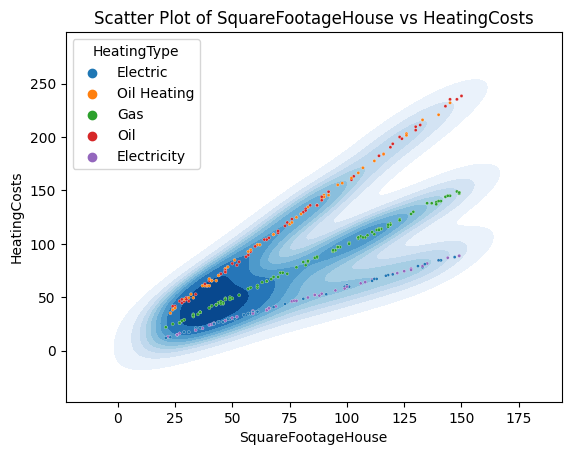

In [20]:
filtered_df = df[df['SquareFootageHouse'] < 400]
filtered_df = filtered_df[filtered_df['HeatingCosts'] < 2000]
filtered_df = filtered_df[filtered_df['HeatingCosts'] >= 0]
# Negative values
print("Negative values: ", filtered_df[filtered_df['SquareFootageHouse'] < 0].shape)
filtered_df = filtered_df[filtered_df['SquareFootageHouse'] >= 0] # filter negative values
# Entries left in the dataset
print("Data entries left after filtering: ", filtered_df.shape)

sns.kdeplot(x=filtered_df['SquareFootageHouse'], y=filtered_df['HeatingCosts'], fill=True, cmap='Blues', levels=10)
sns.scatterplot(x=filtered_df['SquareFootageHouse'], y=filtered_df['HeatingCosts'], hue='HeatingType', data=filtered_df, alpha=1, s=5, color='Set1')
plt.xlabel('SquareFootageHouse')
plt.ylabel('HeatingCosts')
plt.title('Scatter Plot of SquareFootageHouse vs HeatingCosts')
plt.show()


## Outlier Analysis

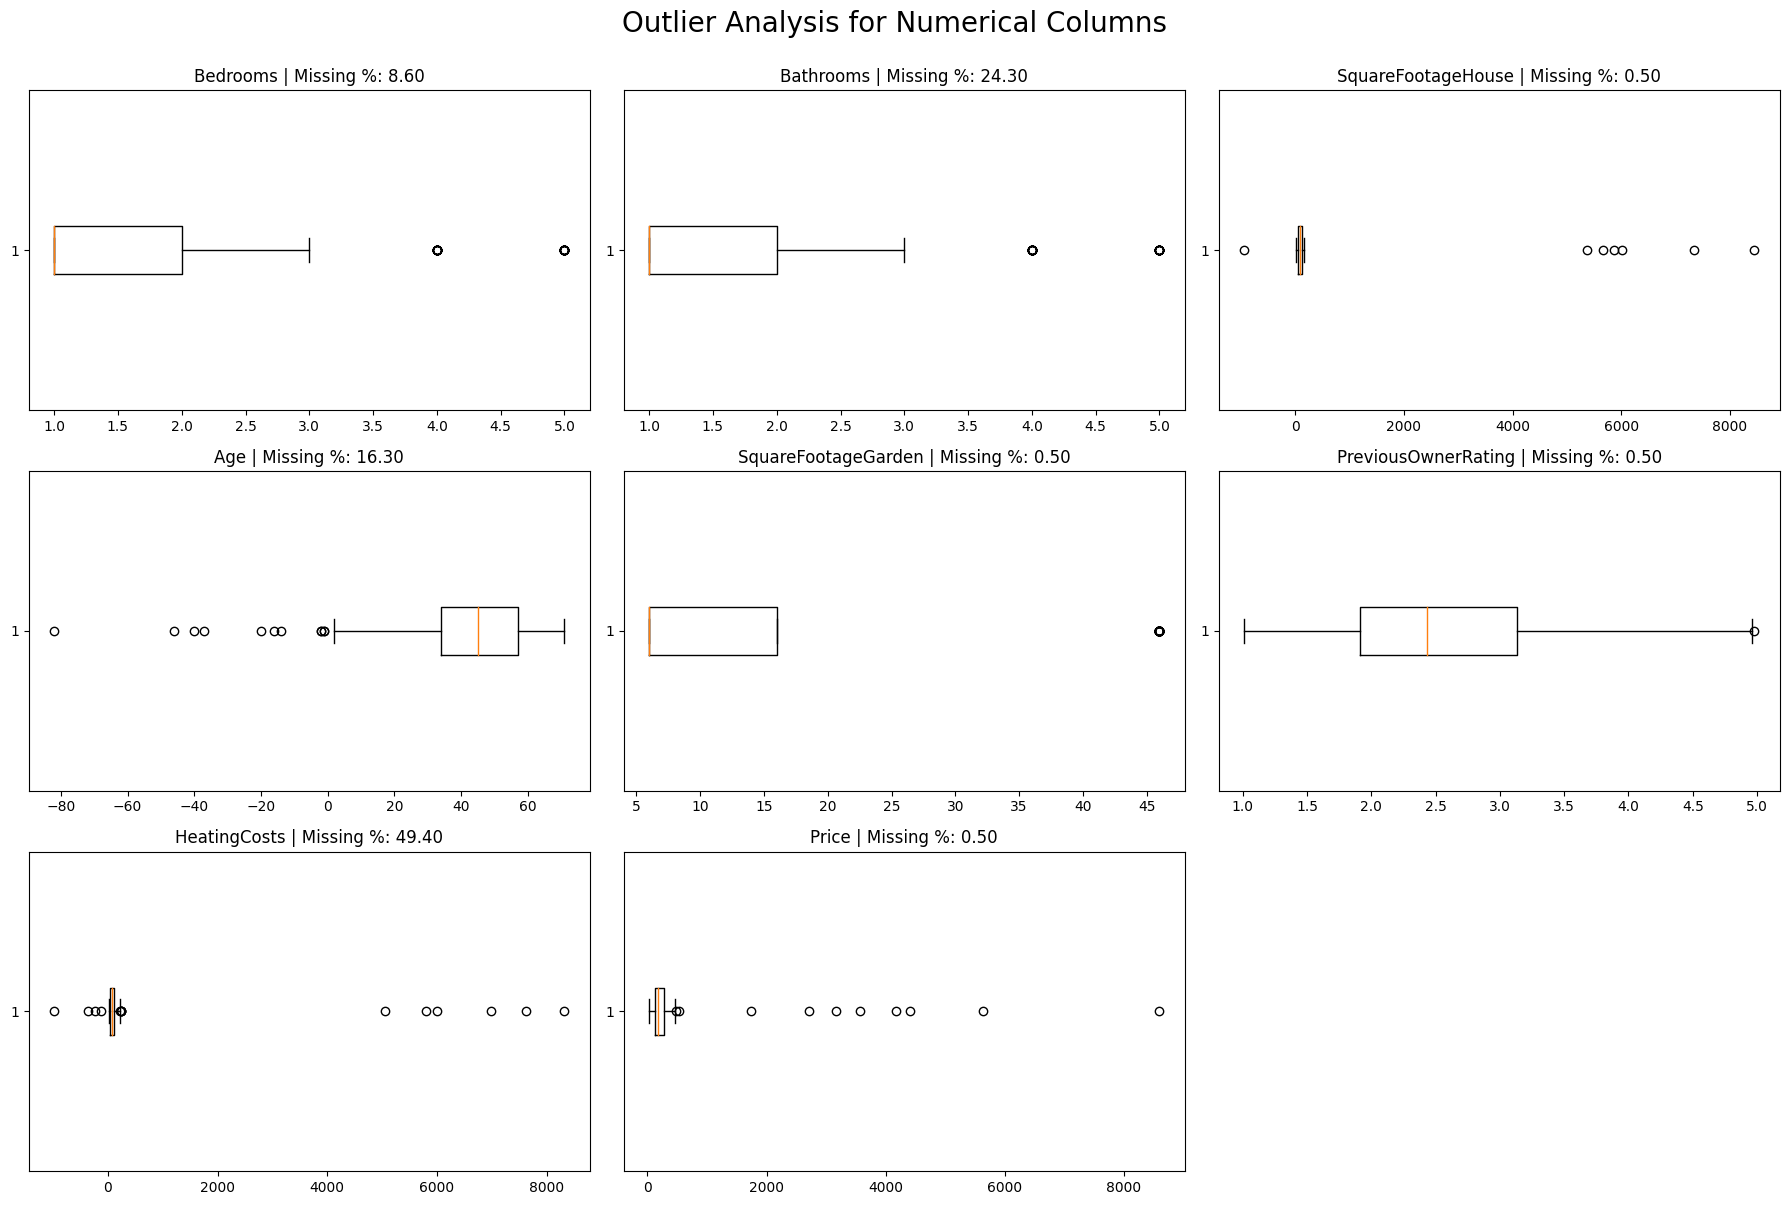

In [21]:
# Determine the number of rows and columns for subplots
num_features = len(numerical_columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features - 1) // num_cols + 1  # Number of rows for subplots

# Set the figure size
plt.figure(figsize=(18, 4 * num_rows))
plt.suptitle("Outlier Analysis for Numerical Columns", fontsize=20, y=1)
# Plot histograms for each numerical feature
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'{column} | Missing %: {numerical_missing_distribution[column]:.2f}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Summarization and key findings

- [x] Correlation matrix showed little to no correlation between features
- [x] Maybe we should create a new feature called `HasPool` based on PoolQuality feature (missing values mean there is no pool)
- [ ] Compute some other numerical features out of DateSinceForSale (date/months/years since for sale)
- [ ] PreviousOwnerName may not be so useful (also has 39% missing values), see if there is anything we can do with it
- [x] HeatingCosts feature also has near half missing values (49%), maybe we can discard it?
- [x] The WindowModelNames feature has 995 different values, but each of them contain the material that the window is made from. We can extract if it's Aluminium, Steel or Wood and use this as a feature.
- [x] SquareFootageHouse, Age and HeatingCosts features have negative minimum values - maybe we should apply `abs()` to those features
- [x] SquareFootageHouse, Heating and Price may contain some outliers? Further investigate this - look if the features are correlated for samples with those values
- [x] Location feature has a duplicate field, `Suburban` written correctly and then again with a typo (double `n` at the end)
- [x] HeatingType also has duplicates - Oil/Oil Heating and Electric/Electricity
- [-] We have no info related to the number of living rooms, however we know their condition. Should we ask something regarding this?
- [-] \# of Bathrooms, Bedrooms and SquareFootageGarden seem to have a higher impact on the Price. PreviousOwnerRating also seems to matter, based on correlation matrix - as expected
- [x] Age does not seem to negatively impact the price of a house (see multivariate analysis section)
- [x] Urban and rural houses seem to have the same prices, so the area does not significantly impact the price of a house

## Further investigations

- [ ] [MODELLING] Check feature importance when fitting a model to see what features gain the most importance
- [-] Maybe check mutual information between features
- [x] Ask Tutor, if there is no value (not the string 'None') for `PoolQuality`, is there a pool?
  - Answer: String `None` means that there is no pool, blank means that the value is missing, so you don‘t know.
- [x] Create a density scatter-plot for "Age" and "Price".
- [x] [redundant] Calculate correlation metrics between each features and the price.
- [x] Can we interpolate Heating Costs from SquareFootageHouse for the remaining entries that don't have heating costs but the square footage house assigned? E.g. is there a linear relationship between the two features?
- [x] Square-Footage House vs. Heating Costs relationship:
  - [-] Location (urban, sub-urban, rural)
  - [x] Heating-Type
- [-] Correlation between Previous Owner Name and Price
---

- [ ] Correlation between categorical and numerical features, e.g. `Age` and `LivingRoomQuality` etc.